<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>AMAZON </b><strong style="color:#ffff80;font-size:45px;font-family:initial;"><b>FINE FOOD </b><strong style="color:#ffff80;font-size:45px;font-family:initial;"><b>ANALYSIS</b></strong></strong></strong></h1>

<h2 style="color:#0b0305;font-size:24px;font-family:initial;text-align:center;"><strong><b>First Lets Start With - What is Amazon Fine Food Review Analysis?</b></strong></h2>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left;">This dataset consists of reviews of fine foods from amazon. The data span a period of <b>more than 10 years</b>, including all <b>~500,000 reviews up to October 2012</b>. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories.<br>
Amazon reviews are often the most publicly visible reviews of consumer products. As a frequent Amazon user, I was interested in examining the structure of a large database of Amazon reviews and visualizing this information to be a smarter consumer and reviewer.<br>

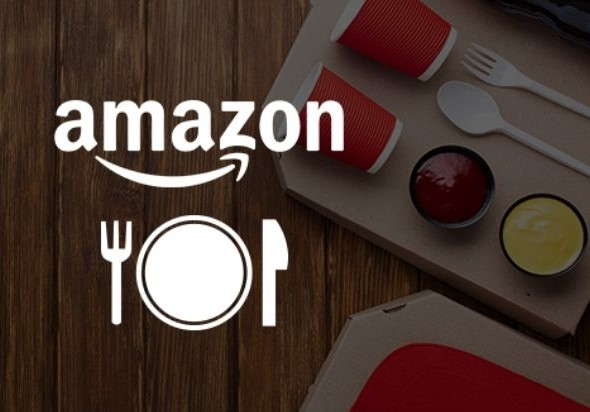

<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>DASHBOARD </b></strong></h1>


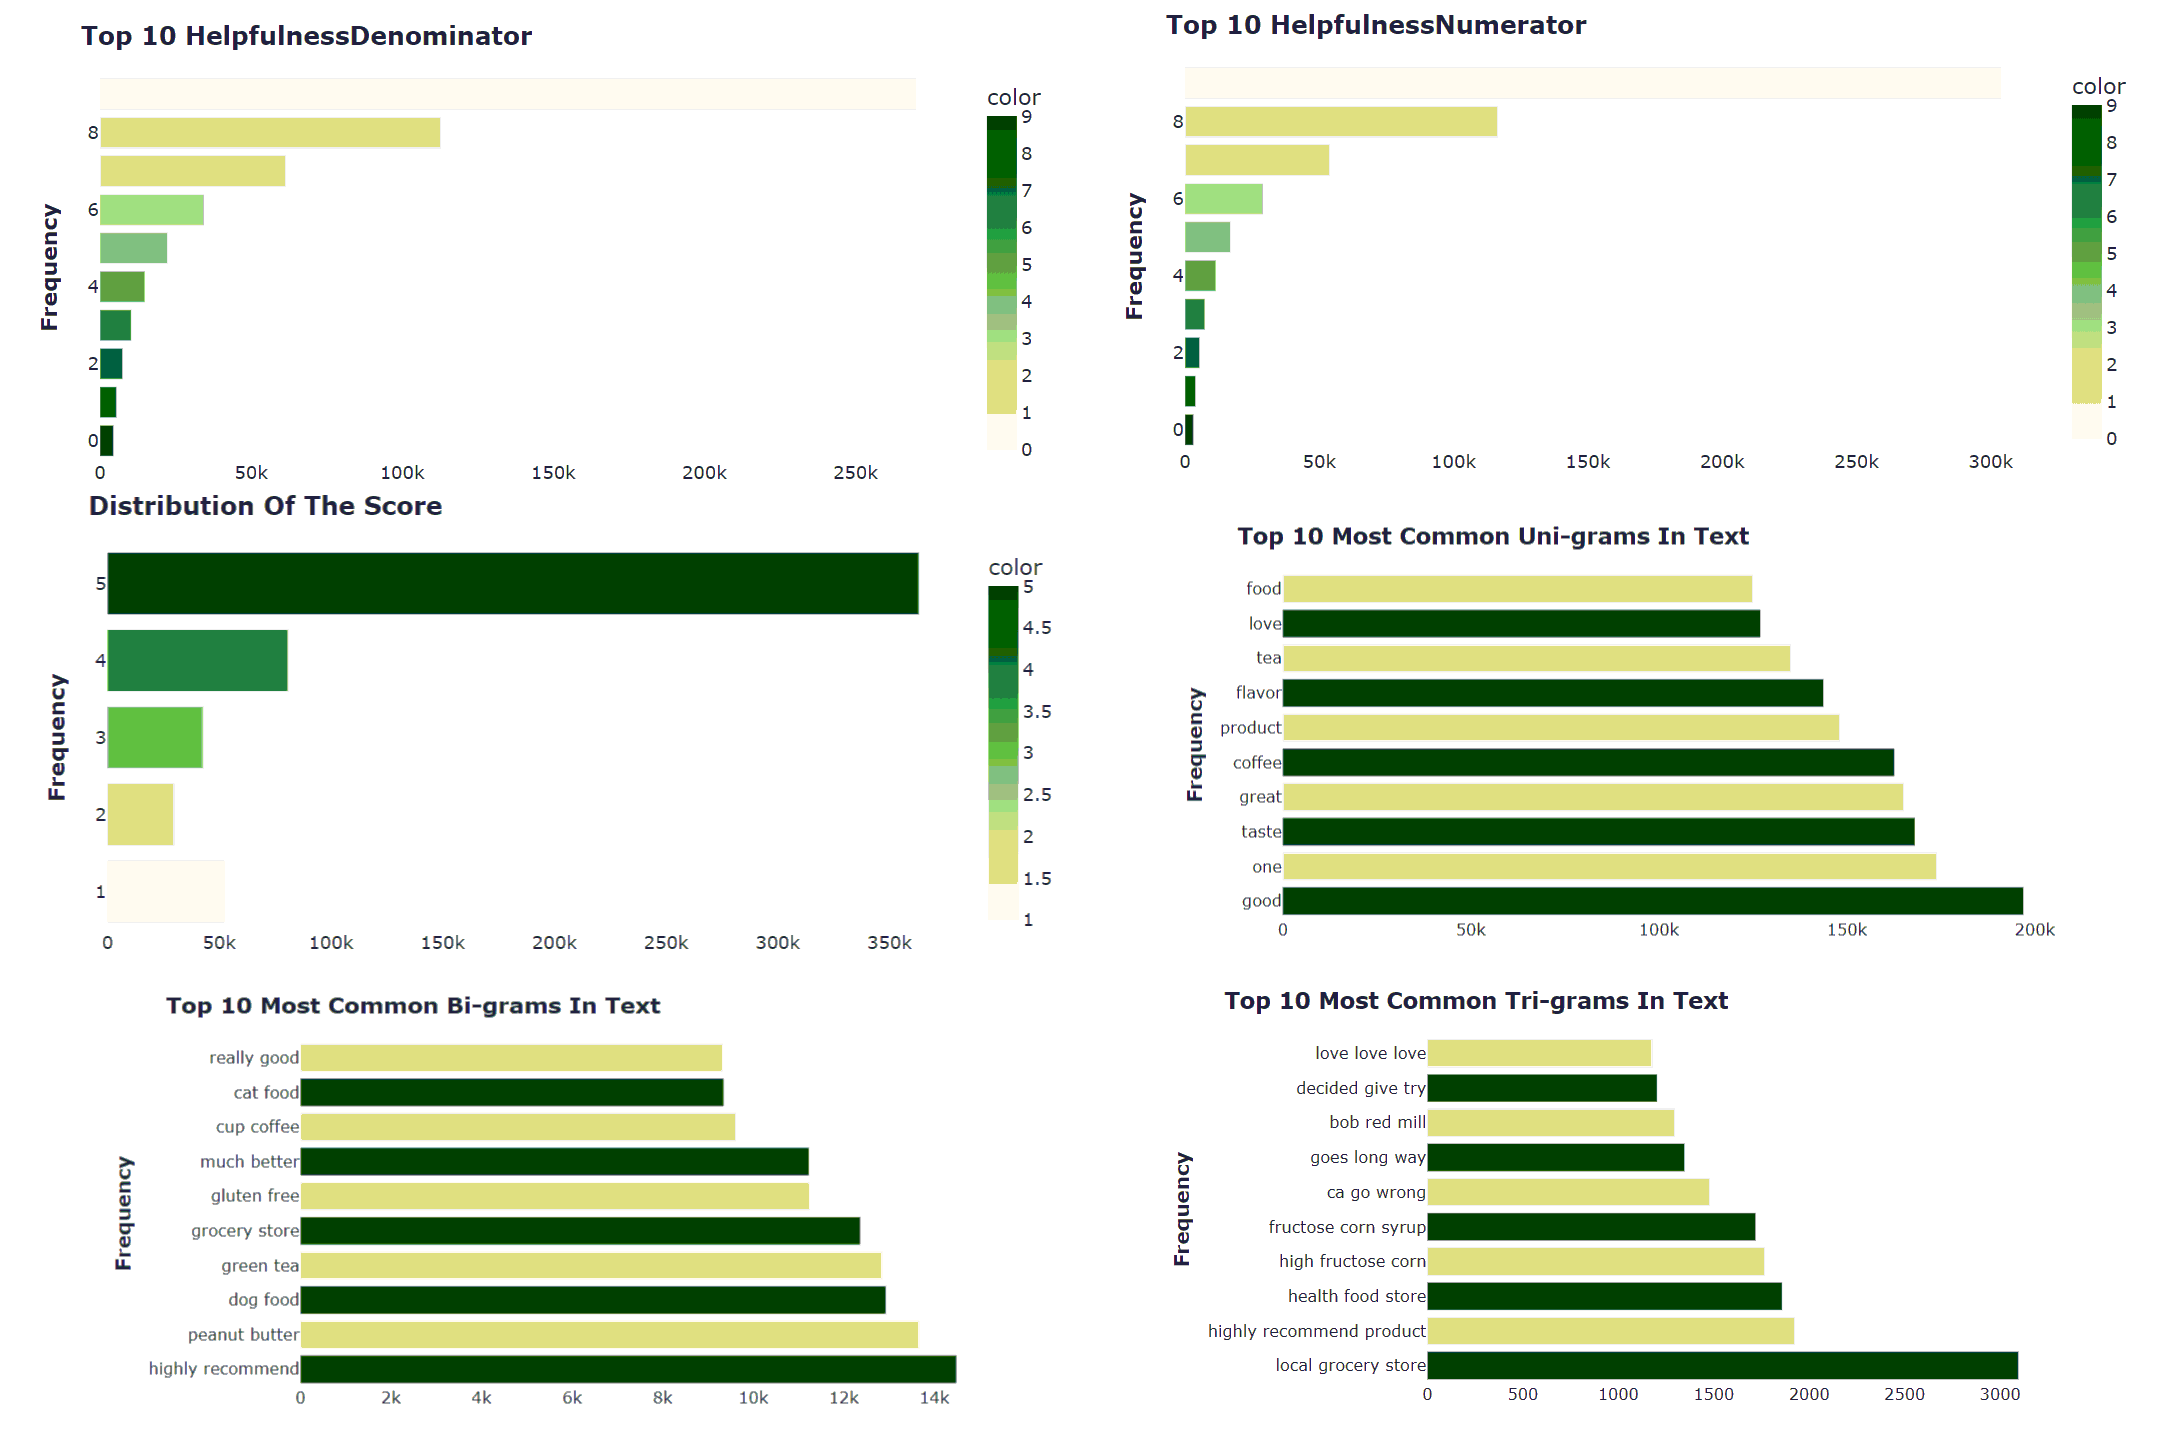

<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>ABOUT THE DATASET </b></strong></h1>

<h2 style="color:#0b0305;font-size:24px;font-family:initial;text-align:center;"><strong><b>The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.</b></strong></h2>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left;">1.Id <br>
2.ProductId — unique identifier for the product.<br>
3.UserId — unique identifier for the user.<br>
4.Helpfulness Numerator — number of users who found the review helpful.<br>
5.HelpfullnessDenominator — number of users who indicated whether they found the review helpful or not.<br>
6.Score — a rating between 1 and 5.<br>
7.Time — timestamp for the review.<br>
8.Summary — Brief summary of the review.<br>
9.Text — Text of the review.<br></p>

<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>OBJECTIVE </b></strong></h1>

<h2 style="color:#0b0305;font-size:24px;font-family:initial;text-align:center;"><strong><b>To determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2)?</b></strong></h2>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left;">A rating of 4 or 5 could be considered a <b>Positive Review</b>. A review of 1 or 2 could be considered <b>Negative Review</b>. A review of 3 is <b>Neutral And Ignored</b>. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.</p>

<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>WORKFLOW STAGES </b></strong></h1>

* [Importing The Libraries](#1)
* [Loading & Reading The DataFrame](#2)
* [Meta Information Of The DataFrame](#3)
* [Checking The Memory Size In Bytes](#4)
* [Find Out The Unique Values In Target Columns----"Outcome"](#5)
* [Finding The Missig Values](#6)
* [Finding The Total Unique Value In Each Column](#7)
* [Finding The Duplicate Records](#8)
* [Basics Statistics](#9)
* [Find The Insights From Each Features](#10)
* [Data PreProcessing](#11)
* [Text PreProcessing](#12)
* [N-gram (Uni-gram,Bi-gram,Tri-gram)](#13)


In [1]:

from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----#1e77b3
color_map = ['#009b9e', '#81ca82', '#81ca82','#b7e1b8', '#c9e8ca','#edf7ed']


prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

<a id="1"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>1. Importing The Libraries:-</u></b></strong></h2>

In [2]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
import matplotlib.pyplot as plt #Visualization of the data....
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Visualizations libraries...
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import scikitplot as skplt

#Natural Language Processing libraries....
from collections import defaultdict
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
import string
import plotly.figure_factory as ff
import random
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


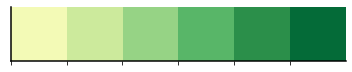

In [4]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

colors=sns.color_palette("YlGn")
sns.palplot(colors)

<a id="2"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>2. Loading & Reading The DataFrame:-</u></b></strong></h2>

In [5]:
df=pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
df.head(2).style.background_gradient(cmap='YlGn')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


In [6]:
#Its always better to have a copy of you dataset.....
df_copy=df.copy()

<a id="3"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>3. Meta Information Of The DataFrame:-</u></b></strong></h2>

In [7]:
#The shape of the dataset.....
df.shape

(568454, 10)

In [8]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('-'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  5
--------------------------------------------------------------------------------
Numerical Variables Column:  ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']


In [9]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of Categorical variables: ', len(cat_features))
print('-'*80)
print('Categorical Variables Column: ',cat_features)

Number of Categorical variables:  5
--------------------------------------------------------------------------------
Categorical Variables Column:  ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']


In [10]:
#The dimensions of the dataset.......
df.ndim

2

In [11]:
#index of the dataset
df.index

RangeIndex(start=0, stop=568454, step=1)

In [12]:
#The size of the dataset.......
df.size

5684540

In [13]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left;"><br>
1.Number of reviews: 568,454<br>
2.Number of users: 256,059<br>
3.Number of products: 74,258<br>
4.Timespan: Oct 1999 — Oct 2012<br>
5.Number of Attributes/Columns in data: 10<br></p>

<a id="4"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>4. Check The Memory Size In Bytes:-</u></b></strong></h2>

In [14]:
#Checking the memory usage w.r.t features...
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')

In [15]:
k = df.memory_usage()
print(k,'bytes'+'\n')

Index                         128
Id                        4547632
ProductId                 4547632
UserId                    4547632
ProfileName               4547632
HelpfulnessNumerator      4547632
HelpfulnessDenominator    4547632
Score                     4547632
Time                      4547632
Summary                   4547632
Text                      4547632
dtype: int64 bytes



<a id="5"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>5. Find The Unqiue Values In Target Column:-</u></b></strong></h2>

In [16]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [17]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Score'}}
multi_table([df_nunique['Score'].style.background_gradient(cmap='YlGn')])

,Score
5,363122
4,80655
1,52268
3,42640
2,29769


<a id="6"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>6. Find The Missing Values In The DataFrame:-</u></b></strong></h2>

<AxesSubplot:>

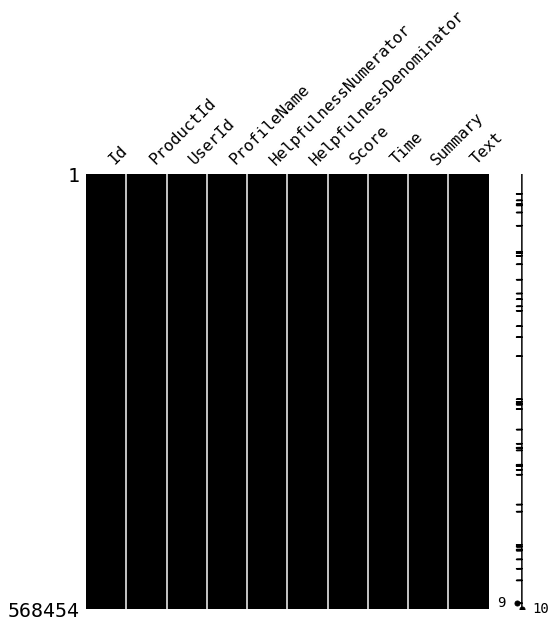

In [18]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0),figsize = (8,8))

In [19]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)[missing_data(df)["Percentage"]!=0].style.background_gradient(cmap='YlGn')

,Total,Percentage
Summary,27,0.004750
ProfileName,16,0.002815


<a id="7"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>7. Find The Total Unique Values In Each Column:-</u></b></strong></h2>

In [20]:
dict={}
for i in df.columns:
    dict[i]=df[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=['Unique']).T.style.background_gradient(cmap='YlGn')

,Unique
Id,568454
ProductId,74258
UserId,256059
ProfileName,218416
HelpfulnessNumerator,231
HelpfulnessDenominator,234
Score,5
Time,3168
Summary,295742
Text,393579


<a id="8"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>8. Finding The Duplicate Records In The DataFrame :-</u></b></strong></h2>

In [21]:
#Finding the duplicates from dataset...
df.duplicated().sum()

0

<a id="9"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>9. Basic Statistics:-</u></b></strong></h2>

In [22]:
# Statistics on Numerical data......
round(df.describe(exclude = ['object']), 2).T.style.background_gradient(cmap='YlGn')

,count,mean,std,min,25%,50%,75%,max
Id,568454.000000,284227.500000,164098.680000,1.000000,142114.250000,284227.500000,426340.750000,568454.000000
HelpfulnessNumerator,568454.000000,1.740000,7.640000,0.000000,0.000000,0.000000,2.000000,866.000000
HelpfulnessDenominator,568454.000000,2.230000,8.290000,0.000000,0.000000,1.000000,2.000000,923.000000
Score,568454.000000,4.180000,1.310000,1.000000,4.000000,5.000000,5.000000,5.000000
Time,568454.000000,1296256604.900000,48043312.330000,939340800.000000,1271289600.000000,1311120000.000000,1332720000.000000,1351209600.000000


<a id="10"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>10. Find The Insights From Each Feature:-</u></b></strong></h2>

In [23]:
#Top 10 HelpfulnessNumerator.....
vc = df['HelpfulnessNumerator'].value_counts().to_frame().reset_index().head(10)
fig = px.bar(x=vc["HelpfulnessNumerator"], y=vc["index"][::-1], orientation='h',color=vc['index'],labels=True,color_continuous_scale="YlGn")
fig.update_layout(title = "<b> Top 10 HelpfulnessNumerator </b>",xaxis_title="",yaxis_title="<b> Frequency </b>",font_size=18, plot_bgcolor="#fff",showlegend=False) 

In [24]:
#Top 10 HelpfulnessDenominator.....
vc = df['HelpfulnessDenominator'].value_counts().to_frame().reset_index().head(10)
fig = px.bar(x=vc["HelpfulnessDenominator"], y=vc["index"][::-1], orientation='h',color=vc['index'],labels=True,color_continuous_scale="YlGn")
fig.update_layout(title = "<b> Top 10 HelpfulnessDenominator </b>",xaxis_title="",yaxis_title="<b> Frequency </b>",font_size=18, plot_bgcolor="#fff",showlegend=False) 

In [25]:
#Distribution of the score .....
vc = df['Score'].value_counts().to_frame().reset_index()
fig = px.bar(x=vc["Score"], y=vc["index"], orientation='h',color=vc['index'],labels=True,color_continuous_scale="YlGn")
fig.update_layout(title = "<b> Distribution Of The Score </b>",xaxis_title="",yaxis_title="<b> Frequency </b> ",font_size=18, plot_bgcolor="#fff",showlegend=False) 

<a id="11"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>11. Data Preprocessing:-</u></b></strong></h2>

In [26]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [27]:
#Removing the redundant features.........
df=df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1)

In [28]:
df.head(2).style.background_gradient(cmap='YlGn')

,Score,Text
0,5,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."


In [29]:
#Score > 3 are positive reviews and Score < 3 are negative reviews....
df["Score"] = df["Score"].apply(lambda score: "1" if score > 3 else "0")

In [30]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Score'}}
multi_table([df_nunique['Score'].style.background_gradient(cmap='YlGn')])

,Score
1,443777
0,124677


In [31]:
#Distribution of the score .....
vc = df['Score'].value_counts().to_frame().reset_index()
fig = px.bar(x=vc["Score"], y=vc["index"], orientation='h',color=vc['index'],labels=True,color_discrete_sequence = ["#004529","#f6fcb8"])
fig.update_layout(title = "<b> Distribution Of The Score </b>",xaxis_title="",yaxis_title="<b> Frequency </b> ",font_size=18, plot_bgcolor="#fff") 

<a id="12"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>12. Text Preprocessing:-</u></b></strong></h2>

In [32]:
def tokenizeandstopwords(Text):
    tokens = nltk.word_tokenize(Text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

In [33]:
df['Text'] = df['Text'].apply(tokenizeandstopwords)

In [34]:
def generate_word_cloud(Text):
    wordcloud = WordCloud(
        background_color='white',
        width = 3000,
        height = 2000).generate(str(Text))
    fig = plt.figure(
        figsize = (20, 12),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

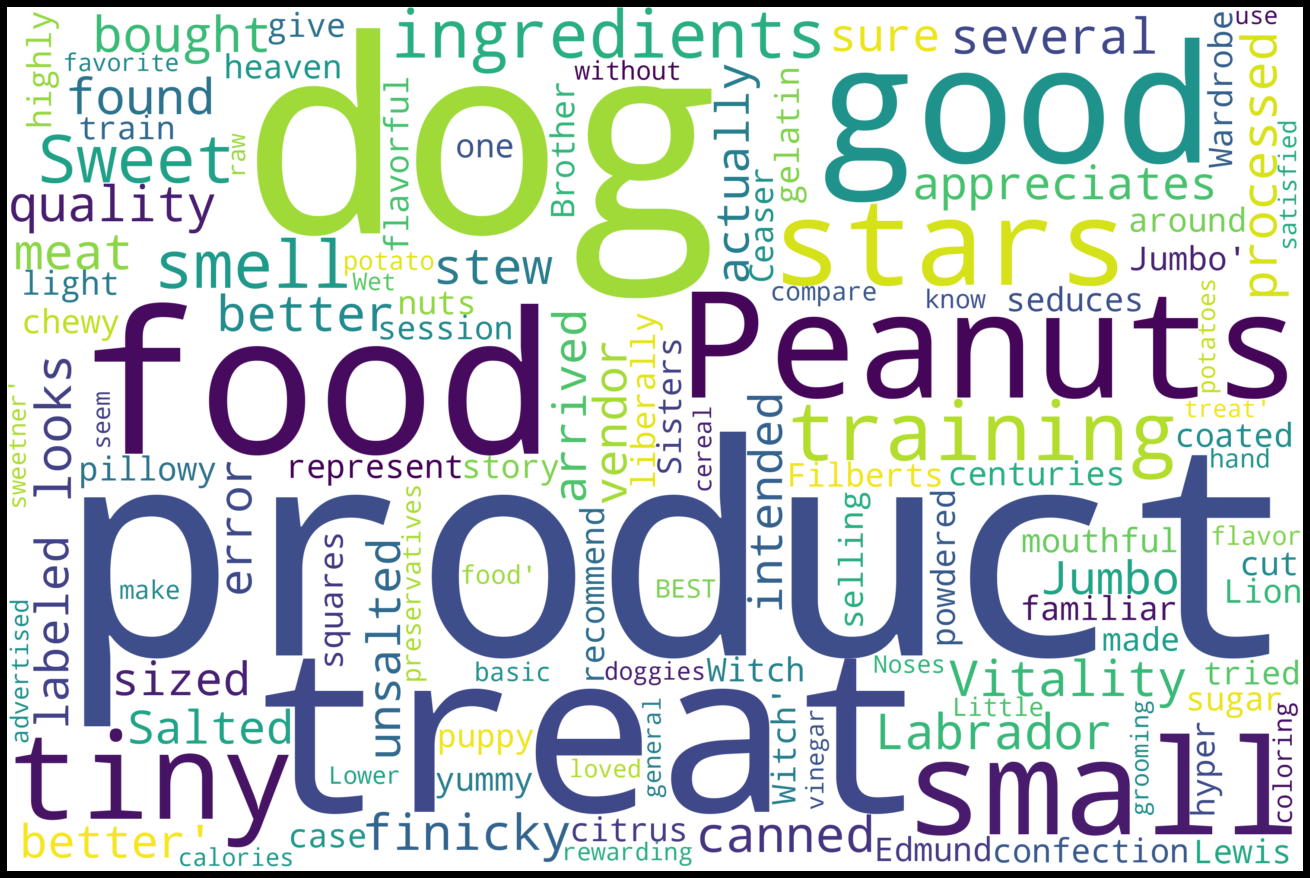

In [35]:
df_text = df.Text.values
generate_word_cloud(df_text)

<a id="13"></a>
<h2 style="color:#0b0305;font-size:28px;font-family:initial;text-align:center;"><strong><b><u>13. N-gram [Uni-gram, Bi-gram, Tri-gram]:-</u></b></strong></h2>

In [36]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [37]:
N = 10

In [38]:
df['Text'] = [' '.join(df['Text'][i].split()) for i in range(len(df))]

In [39]:
df['Text']=df['Text'].str.replace("br","")

In [40]:
less_toxic_unigrams = defaultdict(int)
for tweet in df['Text']:
    for word in generate_ngrams(tweet, 1):
        less_toxic_unigrams[word] += 1
        
df_less_toxic_unigrams = pd.DataFrame(sorted(less_toxic_unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_less_11 = df_less_toxic_unigrams[:N]

fig = px.bar(x=unigrams_less_11[1], y=unigrams_less_11[0], orientation='h',color =unigrams_less_11[0],color_discrete_sequence = ["#004529","#f6fcb8"])
fig.update_layout(title = "<b> Top 10 Most Common Uni-grams In Text </b>",xaxis_title="",yaxis_title="<b> Frequency </b>",font_size=18, plot_bgcolor="#fff",showlegend=False) 

In [41]:
less_toxic_unigrams = defaultdict(int)
for tweet in df['Text']:
    for word in generate_ngrams(tweet, 2):
        less_toxic_unigrams[word] += 1
        
df_less_toxic_unigrams = pd.DataFrame(sorted(less_toxic_unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_less_11 = df_less_toxic_unigrams[:N]

fig = px.bar(x=unigrams_less_11[1], y=unigrams_less_11[0], orientation='h',color =unigrams_less_11[0],color_discrete_sequence = ["#004529","#f6fcb8"])
fig.update_layout(title = "<b> Top 10 Most Common Bi-grams In Text </b>",xaxis_title="",yaxis_title="<b> Frequency </b>",font_size=18, plot_bgcolor="#fff",showlegend=False) 

In [42]:
less_toxic_unigrams = defaultdict(int)
for tweet in df['Text']:
    for word in generate_ngrams(tweet, 3):
        less_toxic_unigrams[word] += 1
        
df_less_toxic_unigrams = pd.DataFrame(sorted(less_toxic_unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_less_11 = df_less_toxic_unigrams[:N]

fig = px.bar(x=unigrams_less_11[1], y=unigrams_less_11[0], orientation='h',color =unigrams_less_11[0],color_discrete_sequence = ["#004529","#f6fcb8"])
fig.update_layout(title = "<b> Top 10 Most Common Tri-grams In Text </b>",xaxis_title="",yaxis_title="<b> Frequency </b>",font_size=18, plot_bgcolor="#fff",showlegend=False) 


<h2 style="color:#0b0305;font-size:30px;font-family:initial;text-align:center;"><strong><b>Part-2 Is Coming Soon. Stay Tune!!</b></strong></h2>

<h1 style="background-color:black;color:#ffff80;font-size:45px;font-family:initial;text-align:center;"><strong><b>THE END </b></strong></h1>